# Análisis de Resultados de Predicción

En esta notebook, analizaremos una muestra de los archivos de predicción generados por la notebook `14.Batch-Prediction-with-Confidence-Intervals.ipynb`.

El objetivo es:
1. Cargar una muestra de los datos de predicción.
2. Realizar un análisis descriptivo de las predicciones y los intervalos de confianza.
3. Visualizar la distribución de los precios predichos y la relación entre la predicción y la amplitud del intervalo.

In [1]:
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definir rutas
predictions_dir = '../../data/predictions/'

# Configurar estilo de visualización
sns.set(style="whitegrid")

# Listar los archivos de predicciones y tomar una muestra
prediction_files = [os.path.join(predictions_dir, f) for f in os.listdir(predictions_dir) if f.endswith('.parquet')]

# Tomar una muestra de 5 archivos para el análisis
sample_files = prediction_files[:5]

if sample_files:
    print(f"Se analizarán {len(sample_files)} archivos de muestra.")
    # Cargar los datos de muestra en un único DataFrame
    df_sample = pd.concat([pd.read_parquet(file) for file in sample_files])
    
    print("\nPrimeras filas de los datos de predicción:")
    display(df_sample.head())
else:
    print("No se encontraron archivos de predicción para analizar.")

Se analizarán 5 archivos de muestra.

Primeras filas de los datos de predicción:


,prediction,lower_bound,upper_bound
0,23287.316406,14230.474785,31866.602061
1,35498.253906,21635.384939,48186.194990
2,17369.582031,9074.353849,29405.596509
3,24009.046875,14671.511745,32854.225420
4,36870.148438,22471.523707,50048.438062


In [12]:
df_sample = df_sample.drop_duplicates()
df_sample.reset_index(drop=True, inplace=True)

In [13]:
# Análisis Descriptivo
if 'df_sample' in locals() and not df_sample.empty:
    print("Estadísticas descriptivas de las predicciones:")
    display(df_sample[['prediction', 'lower_bound', 'upper_bound']].describe().apply(lambda s: s.apply('{:,.2f}'.format)))
    
    # Calcular la amplitud del intervalo de confianza
    df_sample['interval_width'] = df_sample['upper_bound'] - df_sample['lower_bound']
    print("\nEstadísticas de la amplitud del intervalo de confianza:")
    display(df_sample['interval_width'].describe().apply('{:,.2f}'.format))

Estadísticas descriptivas de las predicciones:


,prediction,lower_bound,upper_bound
count,"2,647.00","2,647.00","2,647.00"
mean,"20,106.57","11,682.59","30,264.61"
std,"9,965.86","6,486.41","12,765.20"
min,156.77,81.90,265.41
25%,"13,287.14","6,941.57","22,494.29"
50%,"18,223.24","9,520.33","29,017.98"
75%,"25,221.29","15,412.29","34,513.07"
max,"69,293.31","39,425.77","97,374.95"



Estadísticas de la amplitud del intervalo de confianza:


count     2,647.00
mean     18,582.02
std       6,657.27
min         183.50
25%      15,043.59
50%      18,141.94
75%      21,985.29
max      57,949.19
Name: interval_width, dtype: object

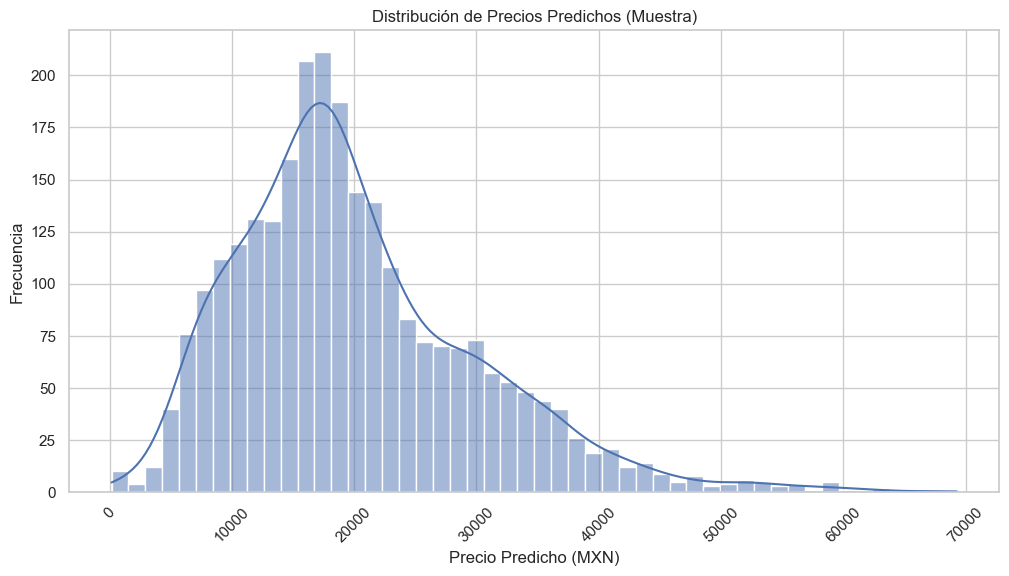

In [14]:
# Visualización de las predicciones
if 'df_sample' in locals() and not df_sample.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df_sample['prediction'], bins=50, kde=True)
    plt.title('Distribución de Precios Predichos (Muestra)')
    plt.xlabel('Precio Predicho (MXN)')
    plt.ylabel('Frecuencia')
    plt.ticklabel_format(style='plain', axis='x')
    plt.xticks(rotation=45)
    plt.show()

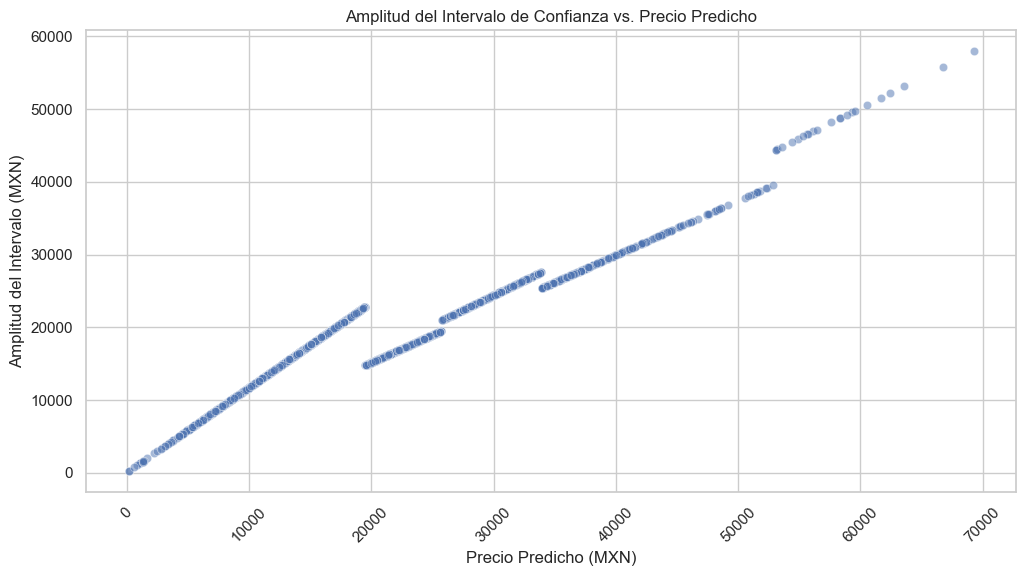

In [15]:
# Visualización de la relación entre predicción y amplitud del intervalo
if 'df_sample' in locals() and not df_sample.empty:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_sample, x='prediction', y='interval_width', alpha=0.5)
    plt.title('Amplitud del Intervalo de Confianza vs. Precio Predicho')
    plt.xlabel('Precio Predicho (MXN)')
    plt.ylabel('Amplitud del Intervalo (MXN)')
    plt.ticklabel_format(style='plain', axis='both')
    plt.xticks(rotation=45)
    plt.show()